In [1]:
# ライブラリをインポート

# データ操作と数値計算のため
import pandas as pd
import numpy as np

# データ可視化のため
import matplotlib.pyplot as plt
import seaborn as sns

# 統計モデリングと計量経済分析のため
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

# for ignore warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "https://www.fbc.keio.ac.jp/~tyabu/keiryo/height_data.csv"
df = pd.read_csv(url)
df['parent'] = (df['father'] + 1.08 * df['mother']) / 2 # 両親の平均(母親の身長は1.08倍し，男性に換算している)
df['height'] = 1.08 * df['student'] * df['female'] + df['student'] * (1 - df['female']) # 女性なら1.08倍し，女性でなければそのまま．
df.head()

,student,father,mother,female,parent,height
0,169.0,175.0,155.0,0,171.20,169.0
1,184.0,172.0,168.0,0,176.72,184.0
2,163.0,169.0,152.0,0,166.58,163.0
3,160.0,165.0,148.0,0,162.42,160.0
4,175.0,173.0,165.0,0,175.60,175.0


In [18]:
df.info() # データフレームの基本情報を確認

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   student  164 non-null    float64
 1   father   164 non-null    float64
 2   mother   164 non-null    float64
 3   female   164 non-null    int64  
 4   parent   164 non-null    float64
 5   height   164 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 7.8 KB


In [17]:
df.describe() # 基本統計量

,student,father,mother,female,parent,height
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,168.171951,172.109756,159.329268,0.310976,172.092683,172.141854
std,7.538535,5.938480,5.257831,0.464311,4.048979,4.929235
min,150.000000,160.000000,148.000000,0.000000,162.420000,160.000000
25%,162.075000,168.000000,156.000000,0.000000,169.450000,169.000000
50%,169.000000,172.000000,159.000000,0.000000,171.400000,172.800000
75%,174.000000,175.000000,163.000000,1.000000,174.980000,175.775000
max,186.500000,188.000000,175.000000,1.000000,185.920000,186.500000


# 2.6節と4.2.2節の推定結果

In [92]:
endog = df['height']         # 被説明変数
exog = df['parent']          # 説明変数
exog = sm.add_constant(exog) # 定数項を追加

model_1 = sm.OLS(
    endog = endog,
    exog = exog,
    data = df
)
results_1 = model_1.fit()
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     67.69
Date:                Sun, 14 Jul 2024   Prob (F-statistic):           5.94e-14
Time:                        15:23:09   Log-Likelihood:                -465.19
No. Observations:                 164   AIC:                             934.4
Df Residuals:                     162   BIC:                             940.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.4088     13.828      4.224      0.0

c:\Users\keise\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


予測値

In [93]:
# 両親の平均身長から子の身長を予測する関数
def get_child_height(parent_height):

    # 予測したい説明変数の値を含む新しいデータフレームを作成
    X_new = pd.DataFrame({
        'const': [1],             # 定数項
        'parent': [parent_height] # 両親の平均身長
    })

    # 予測を実行
    child_height = results_1.predict(X_new)

    # 予測値を表示
    print(f'両親の平均身長が{parent_height}cmのときの子の身長: {child_height[0]:.1f}cm')

    return

In [94]:
parent_height = 190
get_child_height(parent_height)

両親の平均身長が190cmのときの子の身長: 184.0cm


In [95]:
parent_height = 150
get_child_height(parent_height)

両親の平均身長が150cmのときの子の身長: 157.5cm


In [96]:
parent_height = (180 + 1.08 * 158) / 2
get_child_height(parent_height)

両親の平均身長が175.32cmのときの子の身長: 174.3cm


散布図と回帰直線を書く

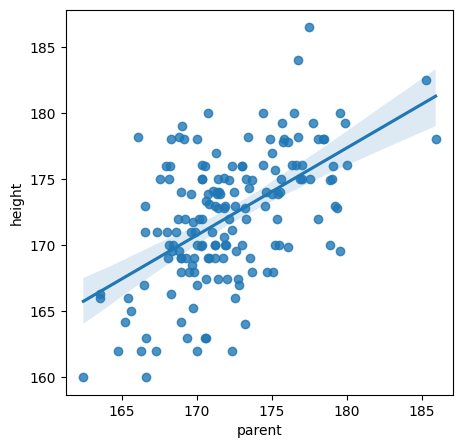

In [97]:
plt.figure(figsize = (5, 5))
sns.regplot(
    x = df['parent'],
    y = df['height'],
    data = df
)
plt.show()

# 5.3.2の推定結果

In [100]:
df['mother2'] = 1.08 * df['mother'] # 母親の身長を男性換算

endog = df['height']             # 被説明変数
exog = df[['father', 'mother2']] # 説明変数
exog = sm.add_constant(exog)     # 定数項

model_2 = sm.OLS(
    endog = endog,
    exog = exog
)
results_2 = model_2.fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     33.64
Date:                Sun, 14 Jul 2024   Prob (F-statistic):           6.22e-13
Time:                        15:24:05   Log-Likelihood:                -465.19
No. Observations:                 164   AIC:                             936.4
Df Residuals:                     161   BIC:                             945.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.4181     13.884      4.208      0.0

In [101]:
endog = df['height']
exog = df['father']
exog = sm.add_constant(exog)

model_3 = sm.OLS(
    endog = endog,
    exog = exog
)
results_3 = model_3.fit()
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     28.69
Date:                Sun, 14 Jul 2024   Prob (F-statistic):           2.87e-07
Time:                        15:24:06   Log-Likelihood:                -480.44
No. Observations:                 164   AIC:                             964.9
Df Residuals:                     162   BIC:                             971.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        116.7299     10.352     11.277      0.0

In [104]:
# 推定結果を1つの表にまとめる．
results_table = summary_col(
    results = [
        results_2,
        results_3
    ],
    model_names = [
        'multiple',
        'simple'
    ],
    stars = True,
    float_format = '%0.2f',
    info_dict = {
        'N':lambda x: "{0:d}".format(int(x.nobs))
    }
)

print(results_table)


               multiple   simple 
---------------------------------
const          58.42*** 116.73***
               (13.88)  (10.35)  
father         0.33***  0.32***  
               (0.05)   (0.06)   
mother2        0.33***           
               (0.06)            
R-squared      0.29     0.15     
R-squared Adj. 0.29     0.15     
N              164      164      
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


# 父親と母親の身長の散布図と標本相関係数

散布図

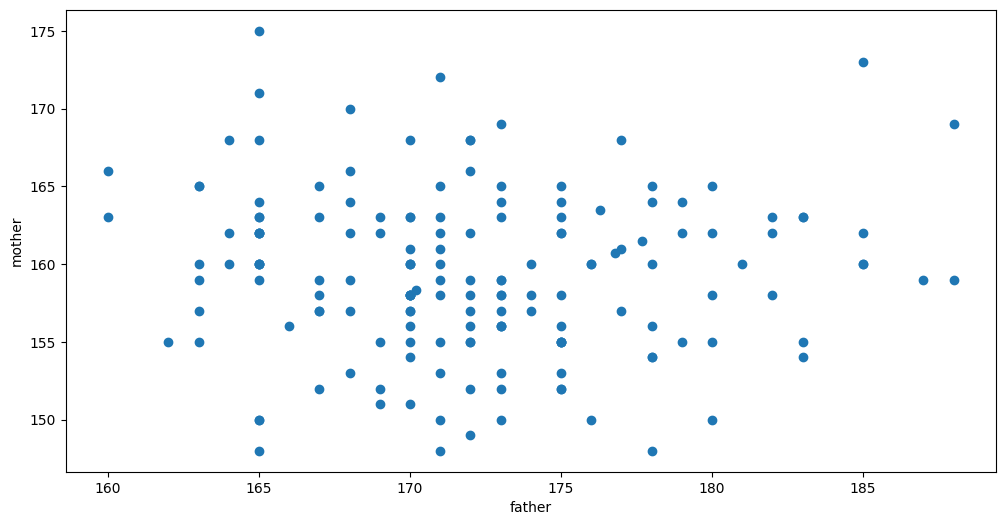

In [114]:
plt.figure(figsize = (12, 6))
plt.scatter(
    x = df['father'],
    y = df['mother']
)
plt.xlabel('father')
plt.ylabel('mother')
plt.show()

標本相関係数

In [120]:
correlation_matrix = np.corrcoef(
    df['mother'],
    df['father']
)

correlation_coefficient = correlation_matrix[0, 1]

print(f"標本相関係数: {correlation_coefficient:.3f}")

標本相関係数: -0.029
